<a href="https://colab.research.google.com/github/raj-027/R-Programs/blob/main/R_assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("caret", dependencies=TRUE)
install.packages("mlbench")  # Needed for PIMA dataset
install.packages("pROC")     # Needed for ROC Curve
install.packages("ggplot2")  # For visualization

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future’, ‘R.oo’, ‘R.utils’, ‘Rdpack’, ‘future.apply’, ‘R.cache’, ‘caTools’, ‘reformulas’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘gplots’, ‘libcoin’, ‘multcomp’, ‘hardhat’, ‘brglm’, ‘lme4’, ‘rex’, ‘plotmo’, ‘prodlim’, ‘questionr’, ‘ROCR’, ‘strucchange’, ‘coin’, ‘sandwich’, ‘e1071’, ‘foreach’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘MLmetrics’, ‘party’, ‘RANN’, ‘spls’, ‘themis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("dplyr")
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Binary Classification

In [ ]:
# Load necessary library
library(ggplot2)

# ==================================================
# 1) Generate dummy two-class data
#    (Similar to make_blobs in Python)
# ==================================================
set.seed(0)

# Number of points per class
n_class <- 500

# Simulate class 0 around (1, 4)
x1_class0 <- rnorm(n_class, mean = 1, sd = 1)
x2_class0 <- rnorm(n_class, mean = 4, sd = 1)

# Simulate class 1 around (2, 1)
x1_class1 <- rnorm(n_class, mean = 2, sd = 1)
x2_class1 <- rnorm(n_class, mean = 1, sd = 1)

# Combine into one dataset
df <- data.frame(
  x1    = c(x1_class0, x1_class1),
  x2    = c(x2_class0, x2_class1),
  class = factor(c(rep(0, n_class), rep(1, n_class)))  # binary classes
)

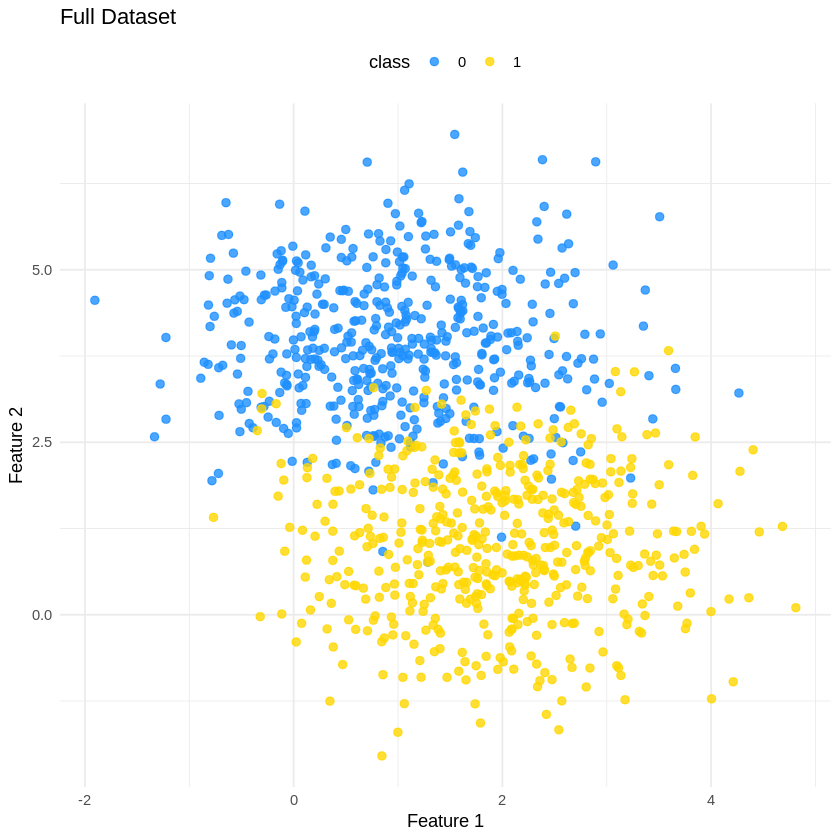

In [ ]:
# ==================================================
# 2) Plot the full dataset using similar colors
# ==================================================
ggplot(df, aes(x = x1, y = x2, color = class)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_manual(values = c("#1E90FF", "#FFD700")) +  # Dark Purple & Yellow
  theme_minimal() +
  labs(title = "Full Dataset", x = "Feature 1", y = "Feature 2") +
  theme(legend.position = "top")

In [ ]:
# ==================================================
# 3) Split into train/test
# ==================================================
set.seed(123)  # for reproducibility
train_indices <- sample(seq_len(nrow(df)), size = 0.7 * nrow(df))

train_df <- df[train_indices, ]
test_df  <- df[-train_indices, ]

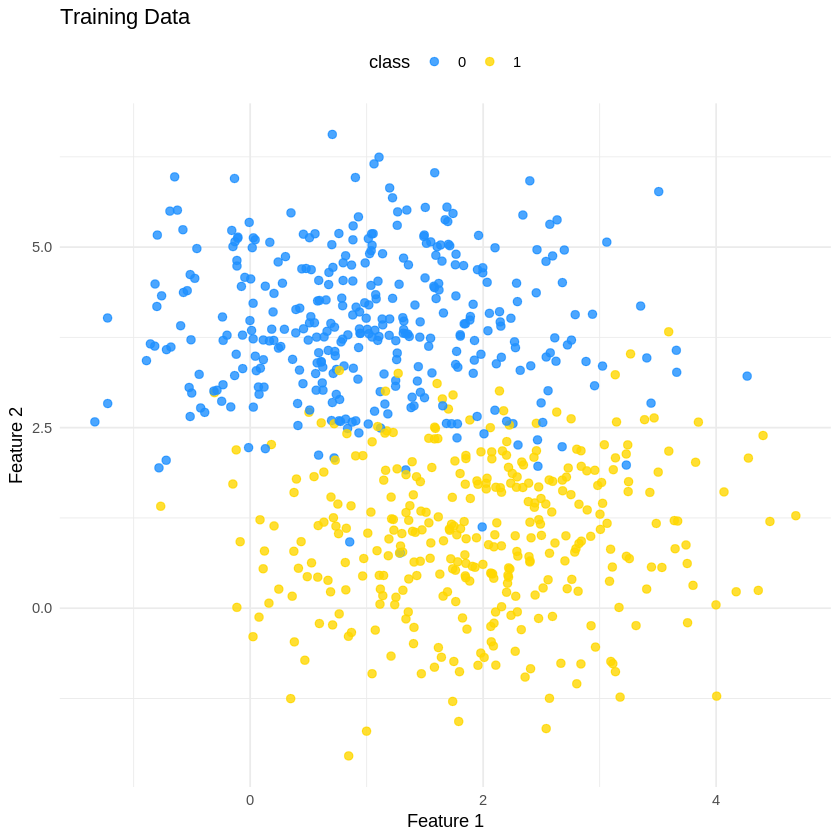

In [ ]:
# ==================================================
# 4) Plot train and test data separately
# ==================================================

# Training set
ggplot(train_df, aes(x = x1, y = x2, color = class)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_manual(values = c("#1E90FF", "#FFD700")) +
  theme_minimal() +
  labs(title = "Training Data", x = "Feature 1", y = "Feature 2") +
  theme(legend.position = "top")

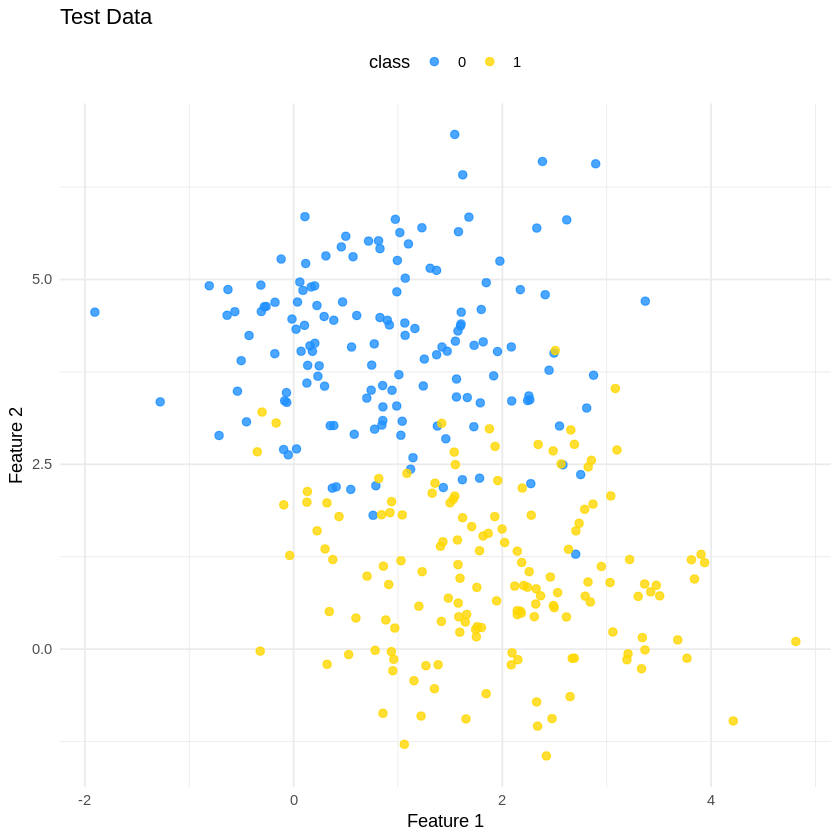

In [ ]:
# Test set
ggplot(test_df, aes(x = x1, y = x2, color = class)) +
  geom_point(alpha = 0.8, size = 2) +
  scale_color_manual(values = c("#1E90FF", "#FFD700")) +
  theme_minimal() +
  labs(title = "Test Data", x = "Feature 1", y = "Feature 2") +
  theme(legend.position = "top")

In [ ]:
library(ggplot2)
library(mlbench)

In [ ]:
data(PimaIndiansDiabetes)
# Get the number of records (rows)
num_records <- nrow(PimaIndiansDiabetes)

# Print the number of records
print(num_records)

[1] 768


In [ ]:
table(PimaIndiansDiabetes$diabetes)



neg pos 
500 268 

In [ ]:
summary(PimaIndiansDiabetes)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            

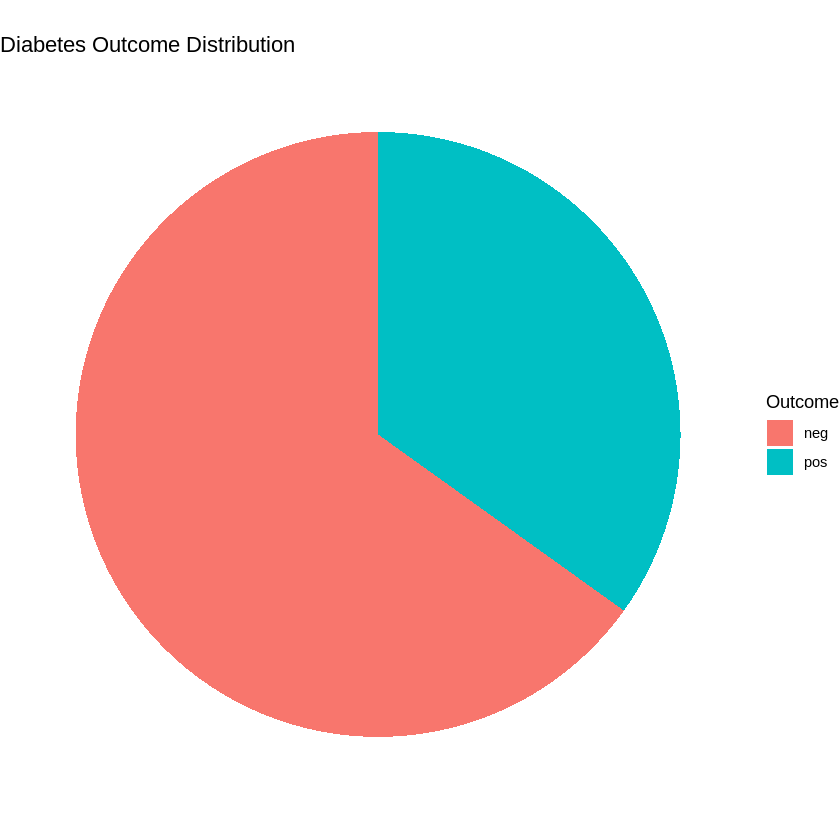

In [ ]:
# Compute proportions of outcome values (Diabetes vs No Diabetes)
target <- prop.table(table(PimaIndiansDiabetes$diabetes))

# Convert to a dataframe for visualization
target_df <- as.data.frame(target)
colnames(target_df) <- c("Outcome", "Proportion")

# Plot the pie chart
ggplot(target_df, aes(x = "", y = Proportion, fill = Outcome)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  ggtitle("Diabetes Outcome Distribution")

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


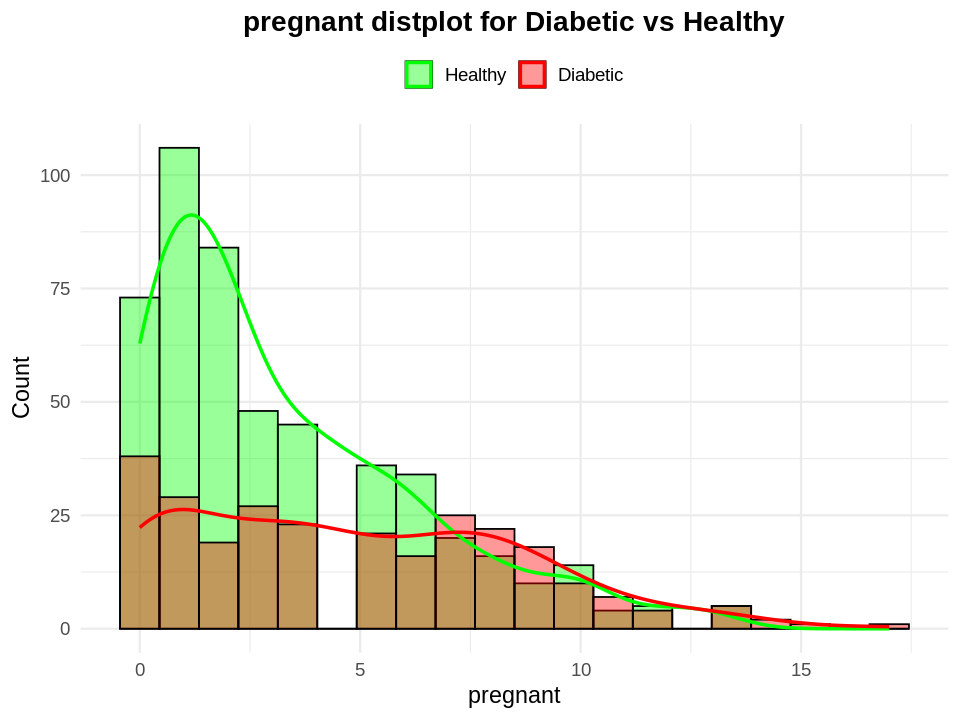

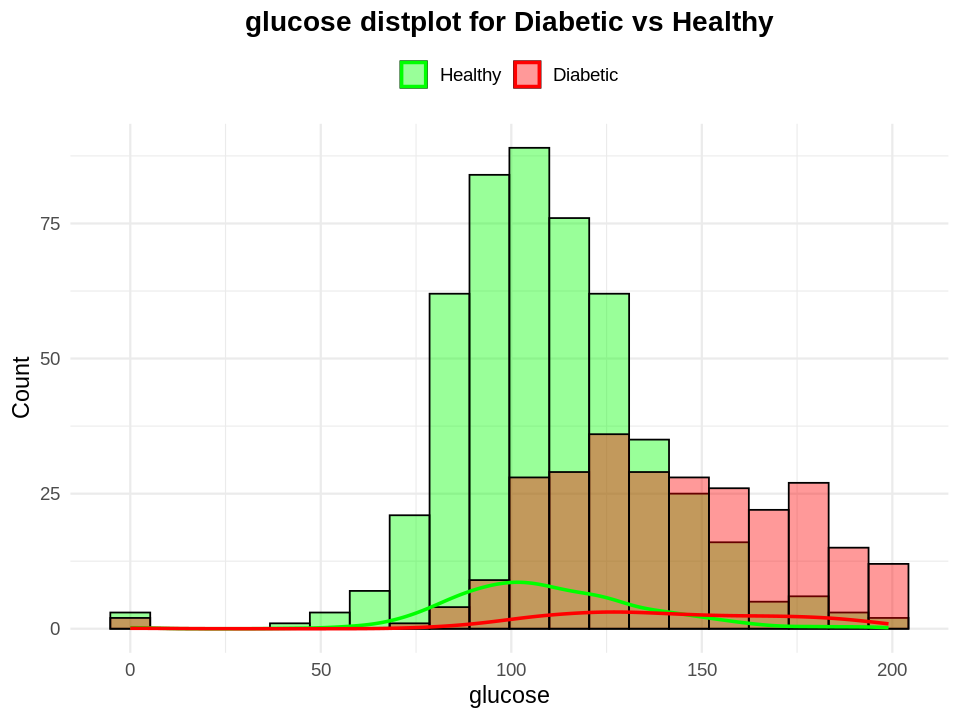

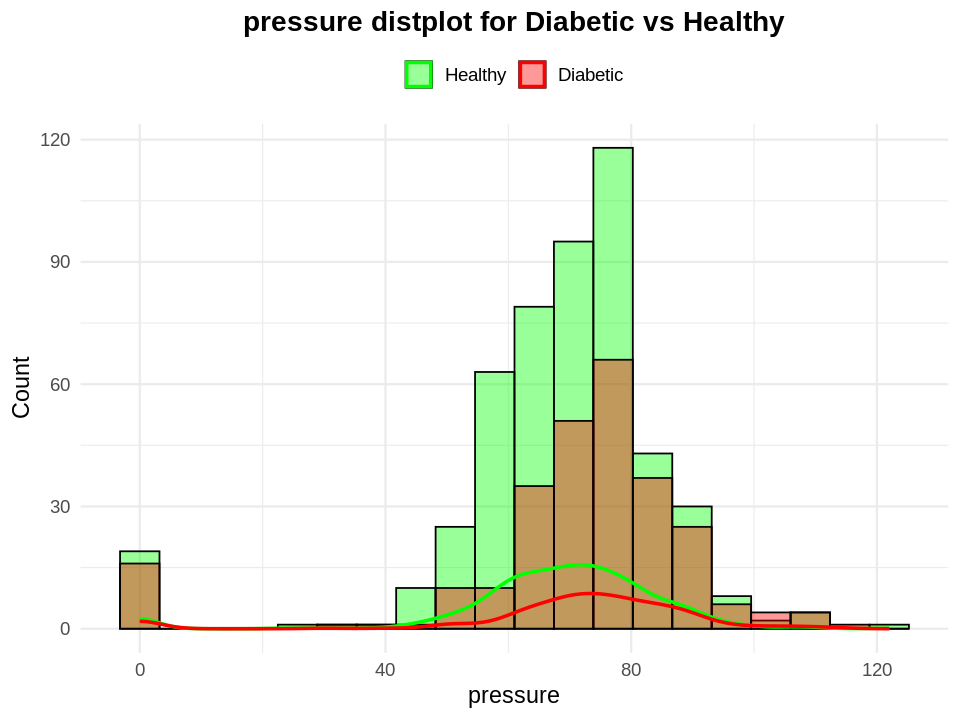

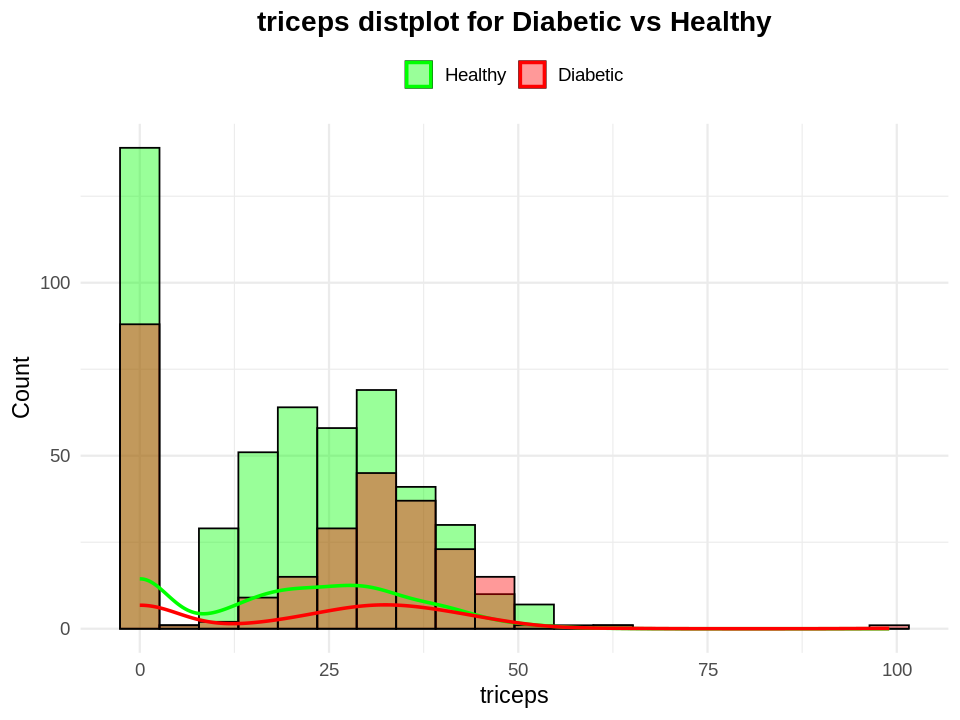

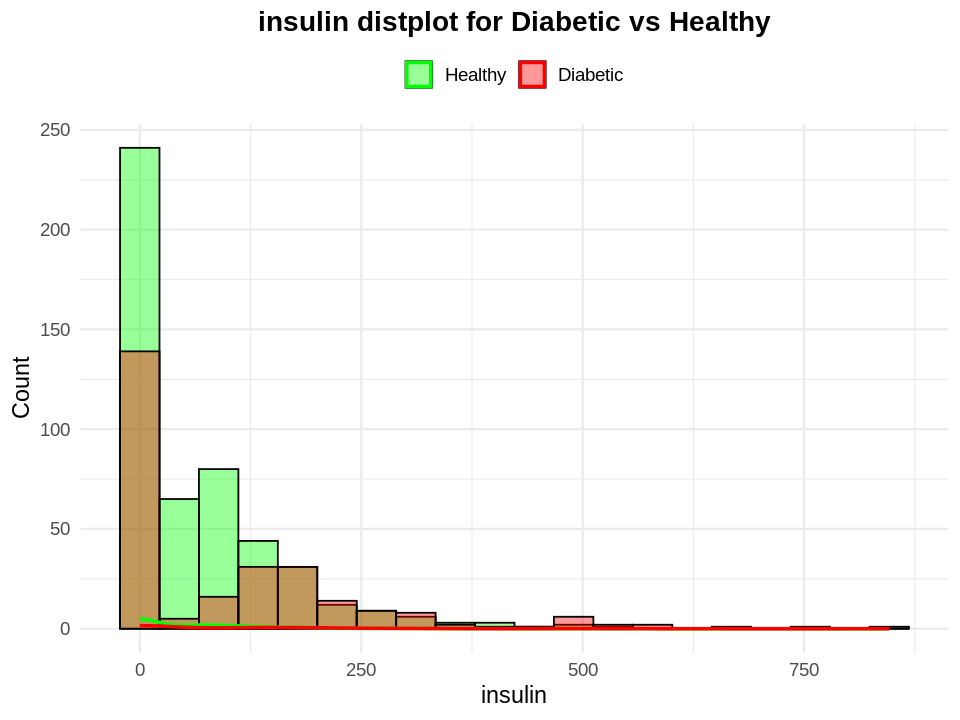

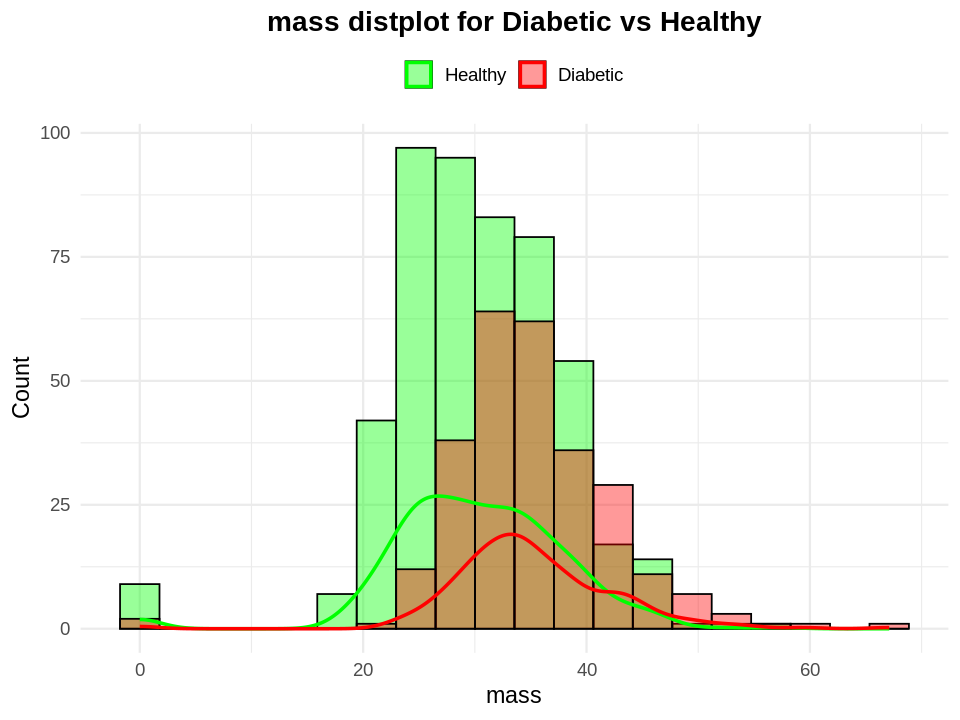

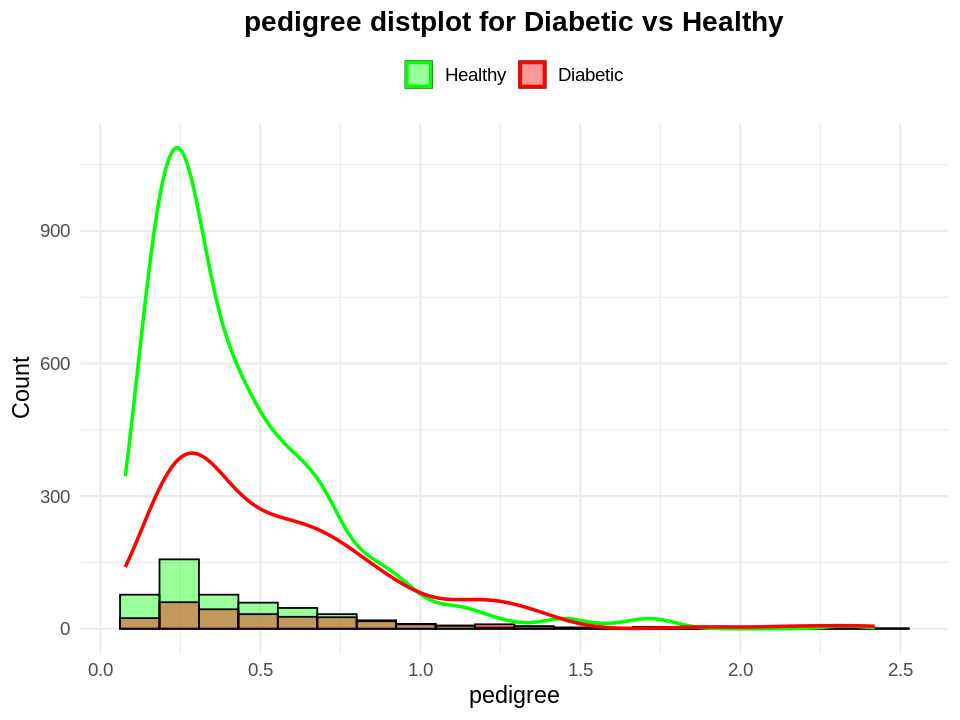

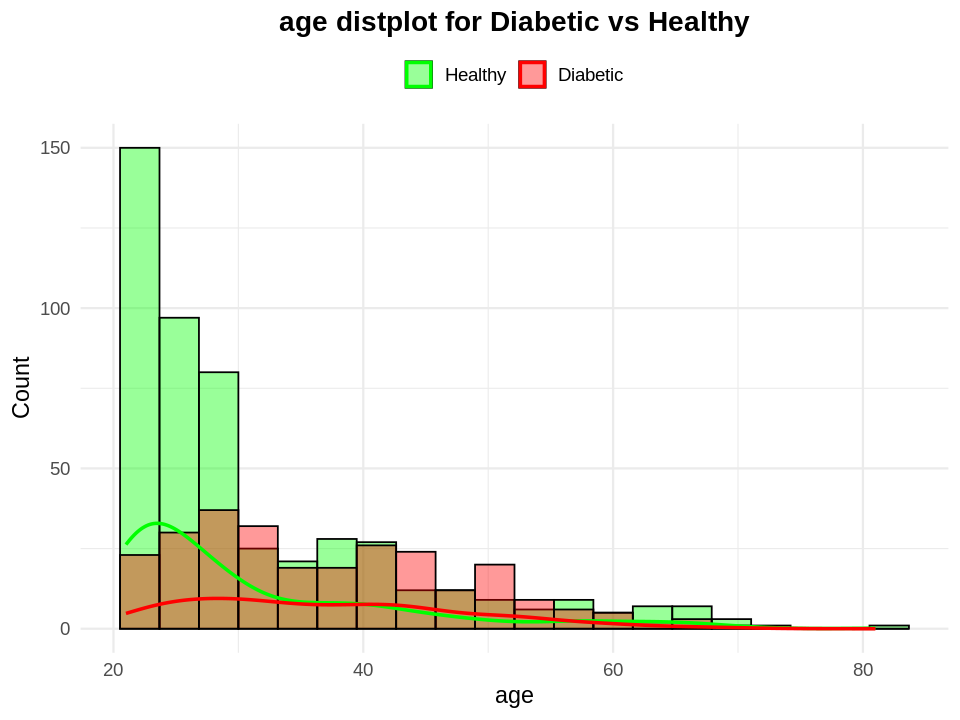

In [ ]:
# Convert Outcome to a factor for visualization
PimaIndiansDiabetes$diabetes <- factor(PimaIndiansDiabetes$diabetes,
                                       levels = c("neg", "pos"),
                                       labels = c("Healthy", "Diabetic"))

# Modified function for better visualization
compare_dist_by_target <- function(features, data) {
  for (feature in features) {
    # Create histogram with density overlay
    p <- ggplot(data, aes_string(x = feature, fill = "diabetes")) +
      geom_histogram(aes(y = ..count..), alpha = 0.4, bins = 20, position = "identity", color = "black") +
      geom_density(aes(y = ..count.., color = diabetes), size = 1,fill = NA) +
      scale_fill_manual(values = c("Healthy" = "green", "Diabetic" = "red")) +  # Matching colors
      scale_color_manual(values = c("Healthy" = "green", "Diabetic" = "red")) +  # KDE curve colors
      labs(title = paste(feature, "distplot for Diabetic vs Healthy"),
           x = feature, y = "Count") +
      theme_minimal(base_size = 14) +
      theme(legend.position = "top",
            legend.title = element_blank(),
            plot.title = element_text(hjust = 0.5, face = "bold"))

    # Print the plot
    print(p)
  }
}

# Increase plot size
options(repr.plot.width = 8, repr.plot.height = 6)

# Get all feature names excluding 'diabetes' (Outcome)
features <- setdiff(names(PimaIndiansDiabetes), "diabetes")

# Call the function for visualization
compare_dist_by_target(features, PimaIndiansDiabetes)

In [ ]:
# Check for missing values in each column
colSums(is.na(PimaIndiansDiabetes))

pregnant  glucose pressure  triceps  insulin     mass pedigree      age 
       0        0        0        0        0        0        0        0 
diabetes 
       0

### Logistic Regreassion

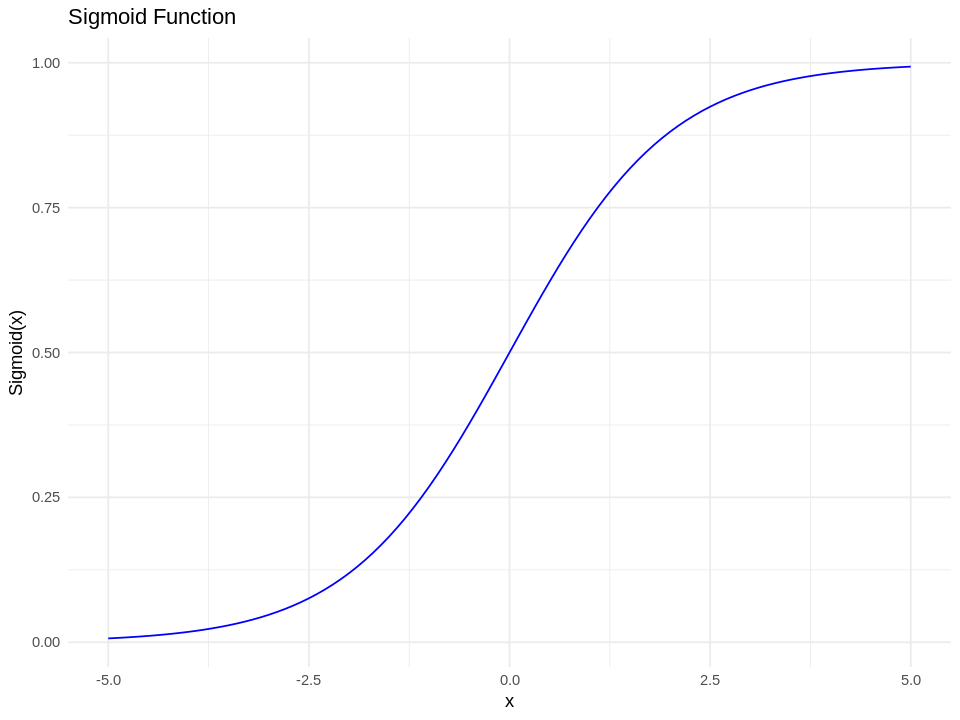

In [ ]:
# Defining the sigmoid function
sigmoid <- function(x) {
  return (1 / (1 + exp(-x)))
}

# Generate inputs from -5 to 5
x <- seq(-5, 5, by = 0.1)

# Apply the sigmoid function
sig <- sigmoid(x)

# Create a data frame for plotting
df <- data.frame(x = x, sigmoid = sig)

# Plot using ggplot2
ggplot(df, aes(x = x, y = sigmoid)) +
  geom_line(color = "blue") +
  ggtitle("Sigmoid Function") +
  xlab("x") +
  ylab("Sigmoid(x)") +
  theme_minimal()

In [ ]:
# Display the first 6 rows of the dataset (default)
head(PimaIndiansDiabetes)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,Diabetic
2,1,85,66,29,0,26.6,0.351,31,Healthy
3,8,183,64,0,0,23.3,0.672,32,Diabetic
4,1,89,66,23,94,28.1,0.167,21,Healthy
5,0,137,40,35,168,43.1,2.288,33,Diabetic
6,5,116,74,0,0,25.6,0.201,30,Healthy


Correlation Plot

In [ ]:
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



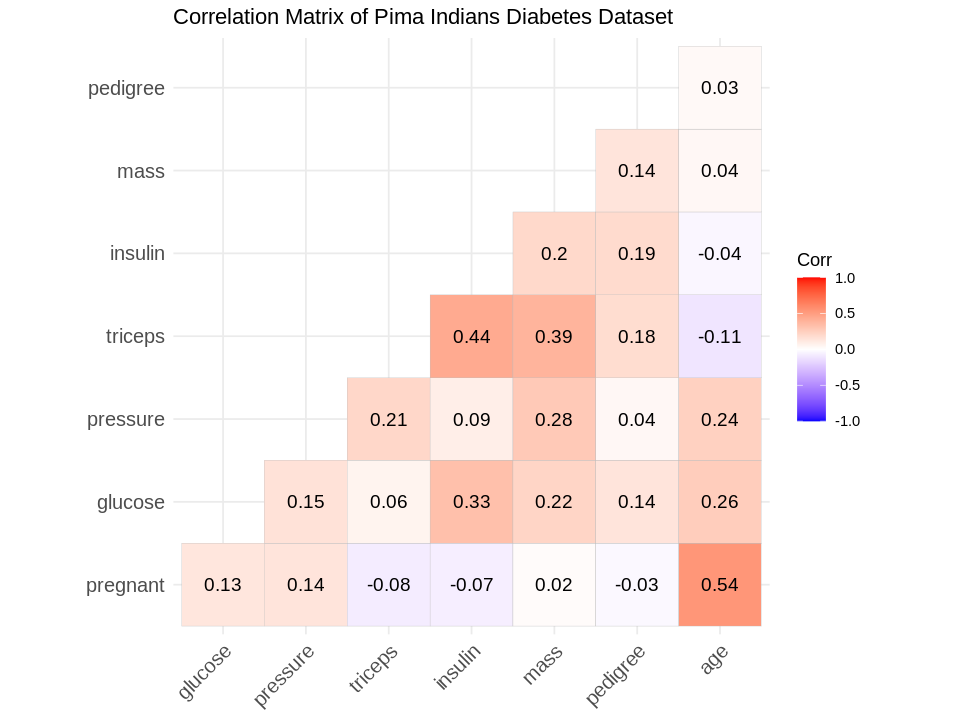

In [ ]:
# Compute correlation matrix
cor_matrix <- cor(PimaIndiansDiabetes[, sapply(PimaIndiansDiabetes, is.numeric)], use = "complete.obs")

# Create a professional-looking heatmap (Lower Triangle)
ggcorrplot(cor_matrix, method = "square", type = "lower",
           colors = c("blue", "white", "red"),  # Blue for negative, red for positive
           lab = TRUE,  # Show correlation values
           lab_size = 4,  # Increase text size
           title = "Correlation Matrix of Pima Indians Diabetes Dataset",
           ggtheme = theme_minimal())

In [ ]:
library(reshape2)

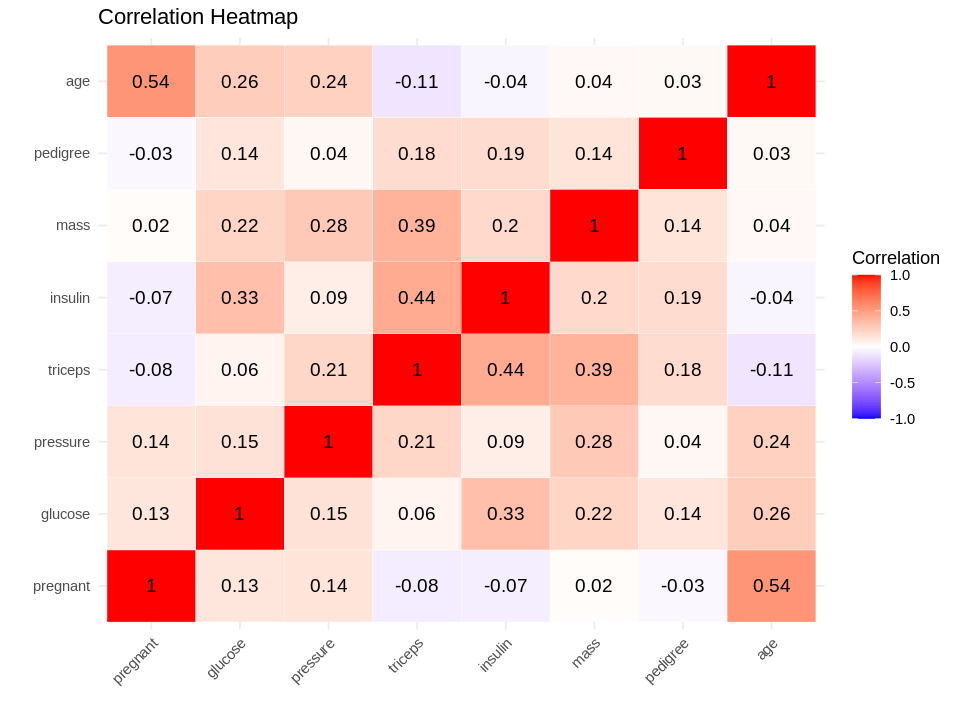

In [ ]:
# Compute correlation matrix
cor_matrix <- cor(PimaIndiansDiabetes[, sapply(PimaIndiansDiabetes, is.numeric)], use = "complete.obs")

# Convert matrix to long format
cor_long <- melt(cor_matrix)

# Heatmap with professional styling
ggplot(cor_long, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +  # White gridlines for better separation
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0,
                       limit = c(-1,1), space = "Lab", name="Correlation") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) +  # Add text labels
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  labs(title = "Correlation Heatmap", x = "", y = "")

In [ ]:
library(caret)

Loading required package: lattice



In [ ]:
trainIndex <- createDataPartition(PimaIndiansDiabetes$diabetes, p = 0.7, list = FALSE)
trainData <- PimaIndiansDiabetes[trainIndex, ]
testData <- PimaIndiansDiabetes[-trainIndex, ]

# Check class distribution in train and test
table(trainData$diabetes)


 Healthy Diabetic 
     350      188 

In [ ]:
table(testData$diabetes)


 Healthy Diabetic 
     150       80 

In [ ]:
dim(trainData)  # Check training data dimensions

[1] 538   9

In [ ]:
dim(testData)   # Check testing data dimensions

[1] 230   9

Train a Logistic regression model

In [ ]:
logit_model <- glm(diabetes ~ ., data = trainData, family = binomial)
predictions <- predict(logit_model, testData, type = "response")  # Get probabilities
pred_class <- ifelse(predictions > 0.5, "Diabetic", "Healthy")  # Convert probabilities to class labels

table(pred_class)  # Check if all predictions are same

pred_class
Diabetic  Healthy 
      64      166 

In [ ]:
table(testData$diabetes, pred_class)


          pred_class
           Diabetic Healthy
  Healthy        13     137
  Diabetic       51      29

In [ ]:
table(trainData$diabetes)


 Healthy Diabetic 
     350      188 

Building model

In [ ]:
# Train a logistic regression model
logit_model <- glm(diabetes ~ ., data = trainData, family = binomial)
table(trainData$diabetes)


 Healthy Diabetic 
     350      188 

In [ ]:
# Predict on test data
pred_prob <- predict(logit_model, testData, type = "response")
# pred_class <- ifelse(pred_prob > 0.5, "pos", "neg")
# pred_class <- ifelse(predictions > 0.5, "Diabetic","Healthy")
pred_class <- ifelse(pred_prob > 0.5, "Diabetic", "Healthy")
pred_class <- factor(pred_class, levels = c("Healthy", "Diabetic"))

# Convert predictions and actual values into factors for confusion matrix
#pred_class <- factor(pred_class, levels = c("neg", "pos"))
# pred_class <- factor(pred_class, levels = c("Healthy", "Diabetic"))
#actual_class <- factor(testData$diabetes, levels = c("neg", "pos"))
actual_class <- factor(testData$diabetes, levels = c("Healthy", "Diabetic"))

# Generate a confusion matrix
conf_matrix <- confusionMatrix(pred_class, actual_class)
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction Healthy Diabetic
  Healthy      137       29
  Diabetic      13       51
                                          
               Accuracy : 0.8174          
                 95% CI : (0.7613, 0.8651)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 2.383e-08       
                                          
                  Kappa : 0.5778          
                                          
 Mcnemar's Test P-Value : 0.02064         
                                          
            Sensitivity : 0.9133          
            Specificity : 0.6375          
         Pos Pred Value : 0.8253          
         Neg Pred Value : 0.7969          
             Prevalence : 0.6522          
         Detection Rate : 0.5957          
   Detection Prevalence : 0.7217          
      Balanced Accuracy : 0.7754          
                                          
       'Positive' Class : Healthy         
   

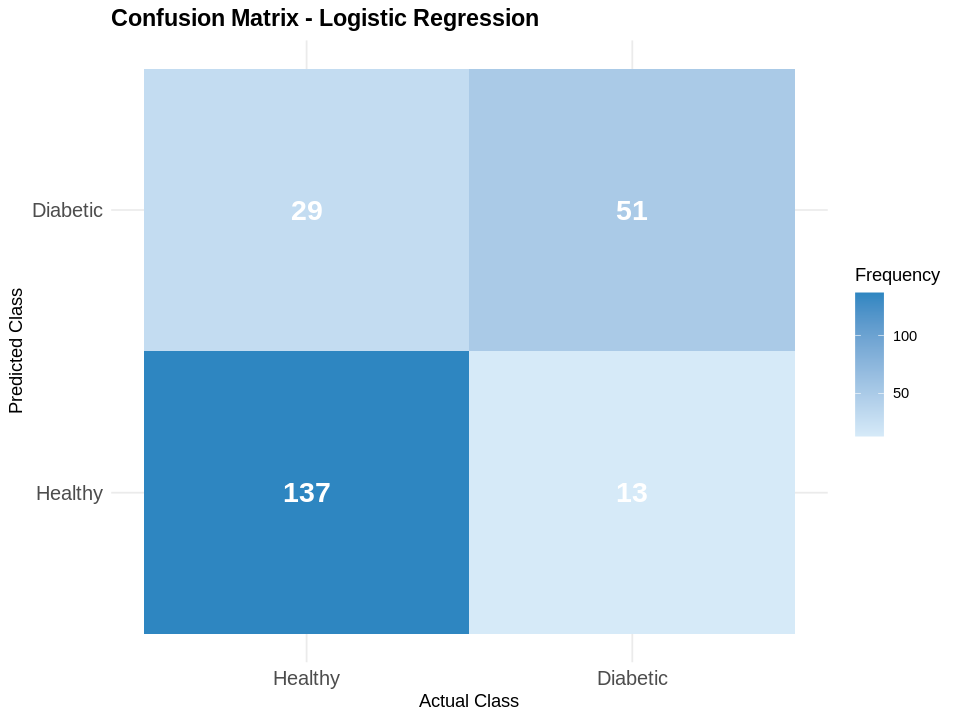

In [ ]:
# Generate the confusion matrix again (if needed)
conf_mat_table <- as.data.frame(conf_matrix$table)
colnames(conf_mat_table) <- c("Reference", "Prediction", "Frequency")

# Define professional color palette
professional_colors <- scale_fill_gradient(low = "#D6EAF8", high = "#2E86C1") # Light to dark blue

# Professional Confusion Matrix Plot
ggplot(conf_mat_table, aes(x = Reference, y = Prediction, fill = Frequency)) +
  geom_tile() +
  geom_text(aes(label = Frequency), color = "white", size = 6, fontface = "bold") +
  professional_colors +
  labs(title = "Confusion Matrix - Logistic Regression",
       x = "Actual Class",
       y = "Predicted Class") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14),
        axis.text = element_text(size = 12),
        legend.position = "right")

In [ ]:
library(RColorBrewer)

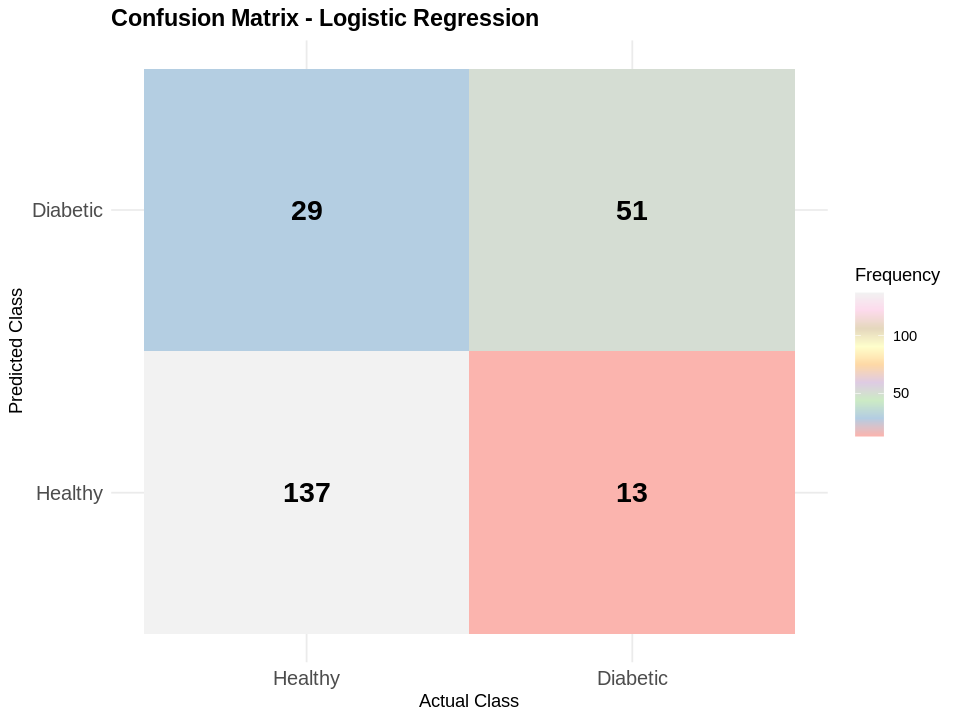

In [ ]:
# Define pastel colors using RColorBrewer
pastel_colors <- scale_fill_gradientn(colors = brewer.pal(9, "Pastel1"))

# Generate the confusion matrix again (if needed)
conf_mat_table <- as.data.frame(conf_matrix$table)
colnames(conf_mat_table) <- c("Reference", "Prediction", "Frequency")

# Plot Confusion Matrix with Pastel Colors
ggplot(conf_mat_table, aes(x = Reference, y = Prediction, fill = Frequency)) +
  geom_tile() +
  geom_text(aes(label = Frequency), color = "black", size = 6, fontface = "bold") + # Black text for better contrast
  pastel_colors +
  labs(title = "Confusion Matrix - Logistic Regression",
       x = "Actual Class",
       y = "Predicted Class") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14),
        axis.text = element_text(size = 12),
        legend.position = "right")

In [ ]:
library(pROC)    # For ROC curve and AUC
# Generate ROC curve data
roc_curve <- roc(testData$diabetes, pred_prob)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = Healthy, case = Diabetic

Setting direction: controls < cases

